# decision tree 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\MUFG\student_performance.csv")
df


,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,No,6,Yes,70,Low
1,5,60,Yes,7,Yes,80,Medium
2,8,85,No,8,Yes,90,High
3,1,35,No,5,No,60,Low
4,6,75,Yes,7,Yes,85,High
5,4,55,Yes,6,Yes,78,Medium
6,3,45,No,7,No,72,Low
7,7,80,Yes,8,Yes,95,High
8,5,65,No,6,Yes,82,Medium
9,2,50,Yes,5,No,68,Low


In [3]:
print("First 5 rows:\n", df.head())


First 5 rows:
    Hours_Studied  Previous_Scores Extracurricular  Sleep_Hours  \
0              2               40              No            6   
1              5               60             Yes            7   
2              8               85              No            8   
3              1               35              No            5   
4              6               75             Yes            7   

  Internet_Access  Attendance Performance  
0             Yes          70         Low  
1             Yes          80      Medium  
2             Yes          90        High  
3              No          60         Low  
4             Yes          85        High  


In [4]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Hours_Studied      0
Previous_Scores    0
Extracurricular    0
Sleep_Hours        0
Internet_Access    0
Attendance         0
Performance        0
dtype: int64


In [13]:

categorical_cols = ["Extracurricular","Internet_Access"]
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df


,Hours_Studied,Previous_Scores,Extracurricular,Sleep_Hours,Internet_Access,Attendance,Performance
0,2,40,0,6,1,70,Low
1,5,60,1,7,1,80,Medium
2,8,85,0,8,1,90,High
3,1,35,0,5,0,60,Low
4,6,75,1,7,1,85,High
5,4,55,1,6,1,78,Medium
6,3,45,0,7,0,72,Low
7,7,80,1,8,1,95,High
8,5,65,0,6,1,82,Medium
9,2,50,1,5,0,68,Low


In [6]:
target_column = "Performance"  
X = df.drop(target_column, axis=1)
y = df[target_column]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)#to maintain the proportion of 
#eachclass label in y is preserved in both training and testing

In [8]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [12]:
y_pred = clf.predict(X_test)
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 1.0

Confusion Matrix:
 [[2 0 0]
 [0 2 0]
 [0 0 2]]

Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00         2
         Low       1.00      1.00      1.00         2
      Medium       1.00      1.00      1.00         2

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



In [9]:
for criterion in ["gini","entropy"]:
    for depth in [1,2,3,4,None]:
        clf_t = DecisionTreeClassifier(criterion=criterion, max_depth=depth, random_state=42)
        clf_t.fit(X_train, y_train)
        acc = accuracy_score(y_test, clf_t.predict(X_test))
        print(f"criterion={criterion}, max_depth={depth}, Accuracy={acc:.4f}")


criterion=gini, max_depth=1, Accuracy=0.6667
criterion=gini, max_depth=2, Accuracy=1.0000
criterion=gini, max_depth=3, Accuracy=1.0000
criterion=gini, max_depth=4, Accuracy=1.0000
criterion=gini, max_depth=None, Accuracy=1.0000
criterion=entropy, max_depth=1, Accuracy=0.6667
criterion=entropy, max_depth=2, Accuracy=1.0000
criterion=entropy, max_depth=3, Accuracy=1.0000
criterion=entropy, max_depth=4, Accuracy=1.0000
criterion=entropy, max_depth=None, Accuracy=1.0000


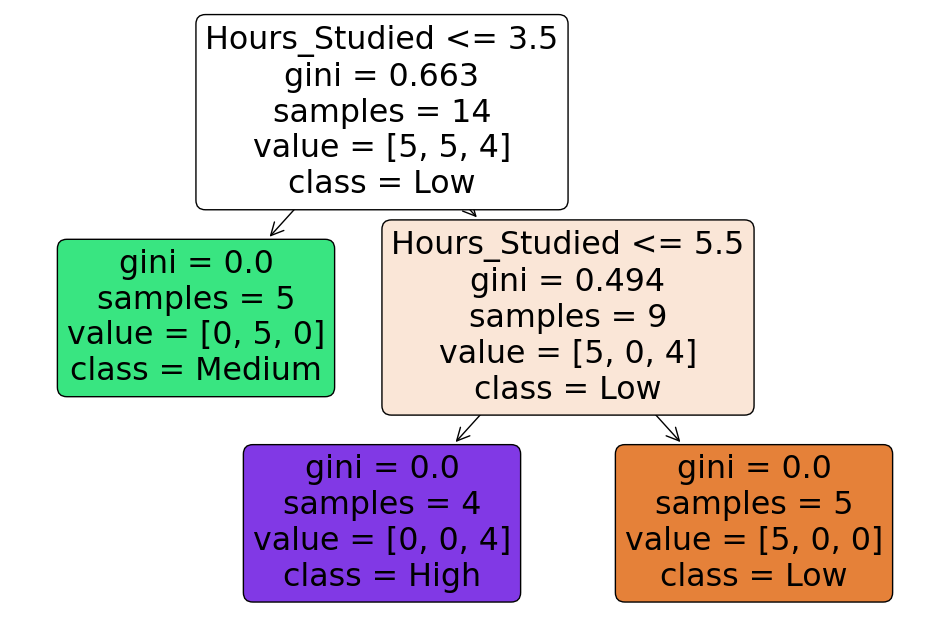

In [14]:

plt.figure(figsize=(12,8))
plot_tree(clf, feature_names=X.columns, class_names=["Low","Medium","High"], filled=True,rounded=True)
plt.show()



Feature Importances:
 Hours_Studied      1.0
Previous_Scores    0.0
Extracurricular    0.0
Sleep_Hours        0.0
Internet_Access    0.0
Attendance         0.0
dtype: float64


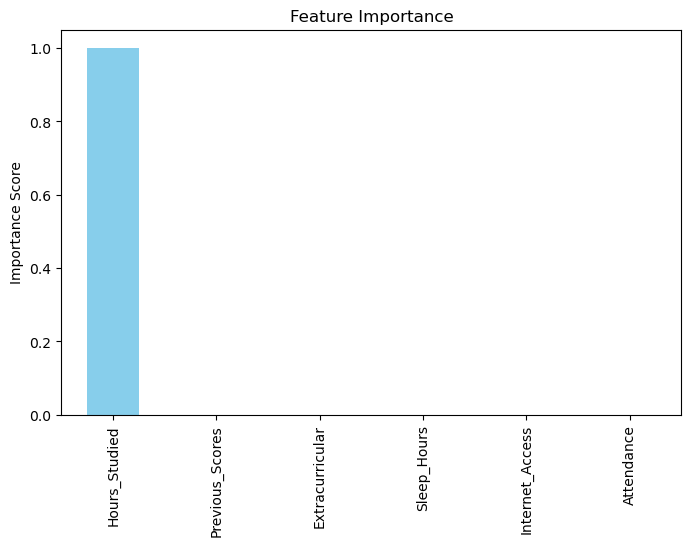

In [11]:
importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature Importances:\n", importances)

plt.figure(figsize=(8,5))
importances.plot(kind='bar', color='skyblue')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()
